In [1]:
#Load packages
install.packages("hoopR")
install.packages("moderndive")
library(hoopR)
library(moderndive)
library(tidyverse)
library(infer)

also installing the dependencies ‘snakecase’, ‘janitor’, ‘RcppParallel’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘operator.tools’, ‘formula.tools’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Introduction
Project By: James Donham, Jack Siemens, Leo Wang, Tiansui Wu

There is a common phrase in sports "home team advantage", but is this advantage statistically significant? In this project, we will attempt to answer this question with hypothesis testing over a sample of NBA basketball games. 

## Background Information

The NBA is the largest and most well-known professional basketball league in the world. The season concludes with exciting playoffs where the top 8 teams in each conference, ranked by win percentage, get to compete for a chance a the coveted NBA Championship. The playoffs are played in best-out-of-seven series'. The team with higher seeding in the regular season gets "home court advantage" for each series, meaning that 4 out of the seven games will be played at the higher seed's home court (Green, 2023). In the NBA, there has always been a notion that teams at their home court play better and have a higher chance of winning. So, throughout the NBA regular season, 30 teams battle in 82 games each to compete for playoff spots and higher seeding for home-court advantage in their playoff series to gain as much advantage as possible. Without the incentive of home-court advantage, games would likely be much less competitive between the top teams in the league who are already guaranteed playoff spots, making some of the best matchups during the regular season less entertaining for the fans. 

Historically, statistics from 1998 to 2008 show that, the home team has a win percentage of 60.6% in the regular season and 64.9% in the playoffs (Belhumeur, 2017). Taking a look at the current 2022-2023, the reigning champion Golden State Warriors have a home record of 33 wins and 8 losses which would place them as the 3rd best team at home in the league, however, their awful away record of 11 wins and 30 losses makes them the 4th worst team on the road in the NBA. The head coach of the Warriors, Steve Kerr, has publicly stated that he believes the road struggles of his team are due to a lack of urgency and purpose when they are not playing in front of their fans. Kerr's explanation falls in line with some theories that suggest  the possible causes of why teams play better at home include the presence of fans, referee bias for the home team, and a placebo effect on the players who simply play better because they believe that playing at home gives them an advantage (Kotecki 2014).

The presence of fans is the most obvious and widely accepted reason why teams may play better at home. This can be explained through the theory that humans seek the approval of their peers, so players will be more likely to put in more effort when approval from their fans is on the line (Kotecki 2014). The approval of fans can have a large impact on an NBA player's life, for example, more fan approval would mean more merchandise sales for the player who gets a percentage of the merchandise sales. Having more fan approval also makes it easier for a player to land better-paying brand deals and endorsements, which gives the player a large incentive to earn the approval of fans when they are present at home games.

Referee bias for the home team is another popular theory as to why teams may perform better at home. Sports fans often forget that the referees are also humans who display the same psychology as everyone else. With this, comes the inevitable desire for the approval of the crowd (Kotecki 2014). Calls that do not favour the home team are often booed and there are often negative chants such as "refs you suck" whenever the fans deem a bad call was made against the team they are supporting. If the home crowd is negative to the referee, the referees are likely to want to make calls that will please the home crowd to gain the approval of the thousands of people in attendance. 

Lastly, due to all the talk surrounding the impact and importance of playing at home, players may receive a placebo effect that they play better at home and end up playing better at home. Players may simply gain more confidence when playing at home which leads to better performance.  

### Inferential Research Question

We are going to be studying the population of all NBA basketball games. The data we are using will be from a package called hoopR containing numerous data over a wide range of NBA games. We are selecting a sample from a population of games from 2009 to 2022, the most recent data the package has. We want to only consider games from recent years as the NBA and the game of basketball are always changing so we want to sample the most recent and accurate representation of NBA games. 

Our point estimate is a sample mean of a statistic we will call home margin, which is the difference in score between the team playing at home versus the team playing away from home. We then take a sample and calculate our point estimate as the mean of this home margin to obtain the center of our statistic across all games played within our sample. 

### Hypothesis

We will assume a null hypothesis of neither team having an advantage (H0: x_bar = 0), with an alternative hypothesis that the home team does have an advantage (HA: x_bar > 0), where x is our test statistic. 

# Methods and Results
The first thing we will do is import our data from hoopR. There is a lot of data in hoopR, so we will only choose games from 2009 to 2022. After that we have to calculate home team advantage stat. For this we simply use the mutate function to calculate the difference between the home teams score and the away teams score. Once we have that, we take a random sample of size of 82 games using rep_sample_n, to make a sample of one season. This removes any unwanted influence from certain years, teams, etc.

From here, we are deciding to use a computational approach to hypothesis testing. So our next step is to bootstrap the sample to create a null hypothesis. We will use the infer package for this. Once that has been created, we will calculate a p-value based on our sample mean. We will use a significance level of 5% (0.05). This will allow us to decide whether or not to reject the null hypothesis. We will then form our conclusion and answer our initial question.

We expect that the home team will have a significant advantage over the away teams due to the psychological impacts of the fans on both the players and referees as well as the placebo effect of playing at home.


The following code is to compute the home team advantage mean statistic, which is our initial estimate. Additionally, the code below will perform the hypothesis test and calculate a p-value. We will also visualize our sample distribution.

In [2]:
# Establishing Years 2009 - 2022
years = c(2009:2022)

# Load full schedule
seasons <- load_nba_schedule(seasons = years)
head(seasons)

id,uid,date,attendance,time_valid,neutral_site,conference_competition,recent,start_date,notes_type,⋯,game_id,season,season_type,PBP,team_box,player_box,game_date_time,game_date,home_venue_id,away_venue_id
<int>,<chr>,<chr>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,⋯,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dttm>,<date>,<int>,<int>
290614019,s:40~l:46~e:290614019~c:290614019,2009-06-15T00:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-15T00:00Z,event,⋯,290614019,2009,3,TRUE,TRUE,TRUE,2009-06-14 20:00:00,2009-06-14,NA,NA
290611019,s:40~l:46~e:290611019~c:290611019,2009-06-12T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-12T01:00Z,event,⋯,290611019,2009,3,TRUE,TRUE,TRUE,2009-06-11 21:00:00,2009-06-11,NA,NA
290609019,s:40~l:46~e:290609019~c:290609019,2009-06-10T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-10T01:00Z,event,⋯,290609019,2009,3,FALSE,TRUE,TRUE,2009-06-09 21:00:00,2009-06-09,NA,NA
290607013,s:40~l:46~e:290607013~c:290607013,2009-06-08T00:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-08T00:00Z,event,⋯,290607013,2009,3,TRUE,TRUE,TRUE,2009-06-07 20:00:00,2009-06-07,NA,NA
290604013,s:40~l:46~e:290604013~c:290604013,2009-06-05T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-05T01:00Z,event,⋯,290604013,2009,3,TRUE,TRUE,TRUE,2009-06-04 21:00:00,2009-06-04,NA,NA
290530019,s:40~l:46~e:290530019~c:290530019,2009-05-31T00:30Z,0,TRUE,FALSE,FALSE,FALSE,2009-05-31T00:30Z,event,⋯,290530019,2009,3,TRUE,TRUE,TRUE,2009-05-30 20:30:00,2009-05-30,NA,NA


We are now going to clean the data and calculate the margin of victory for the home team in every game. By testing the margin of victory, we account for the relative strengths of each team in the league so our data will not be skewed by games where there are one-sided matchups. For example, a historically good team may have a very good margin of victory against every team, however, we can still see if their margin of victory drops when not playing at home. 

In [3]:
# Filter for only regular season games that have concluded, select relevant variables (for all analysis)
# Calculate Home team margin of victory for each game 
seasons_clean <- seasons %>%
  filter(type_abbreviation == "STD", status_type_detail == "Final" |
           status_type_detail == "Final/OT" ) %>%
  select(game_id, date, season, status_type_detail,home_id, home_display_name,away_id, away_display_name,
         home_score, away_score, home_winner, home_color, home_alternate_color,
         away_color, away_alternate_color, id) %>%
  mutate(home_margin = home_score - away_score)
head(seasons_clean)

game_id,date,season,status_type_detail,home_id,home_display_name,away_id,away_display_name,home_score,away_score,home_winner,home_color,home_alternate_color,away_color,away_alternate_color,id,home_margin
<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
290415012,2009-04-16T02:30Z,2009,Final,12,LA Clippers,25,Oklahoma City Thunder,85,126,FALSE,FA0028,f1f2f3,1C3F2C,f05133,290415012,-41
290415021,2009-04-16T02:30Z,2009,Final,21,Phoenix Suns,9,Golden State Warriors,117,113,TRUE,23006A,f1f2f3,00275D,fdb927,290415021,4
290415022,2009-04-16T02:30Z,2009,Final,22,Portland Trail Blazers,7,Denver Nuggets,104,76,TRUE,000000,bac3c9,0860A8,fdb927,290415022,28
290415002,2009-04-16T00:00Z,2009,Final,2,Boston Celtics,27,Washington Wizards,115,107,TRUE,006532,f1f2f3,0E3764,e31837,290415002,8
290415004,2009-04-16T00:00Z,2009,Final,4,Chicago Bulls,28,Toronto Raptors,98,109,FALSE,000000,000000,CE0F41,061922,290415004,-11
290415005,2009-04-16T00:00Z,2009,Final/OT,5,Cleveland Cavaliers,20,Philadelphia 76ers,110,111,FALSE,061642,fdbb30,000000,f1f2f3,290415005,-1


**Table 1** First 6 rows of data from hoopR for seasons from 2009 to 2022.

In [4]:
set.seed(201)
# Pull a random sample of 82 games from the data set, without replacement
sample <- seasons_clean %>%
  rep_sample_n(reps = 1, size = 82, replace = FALSE)

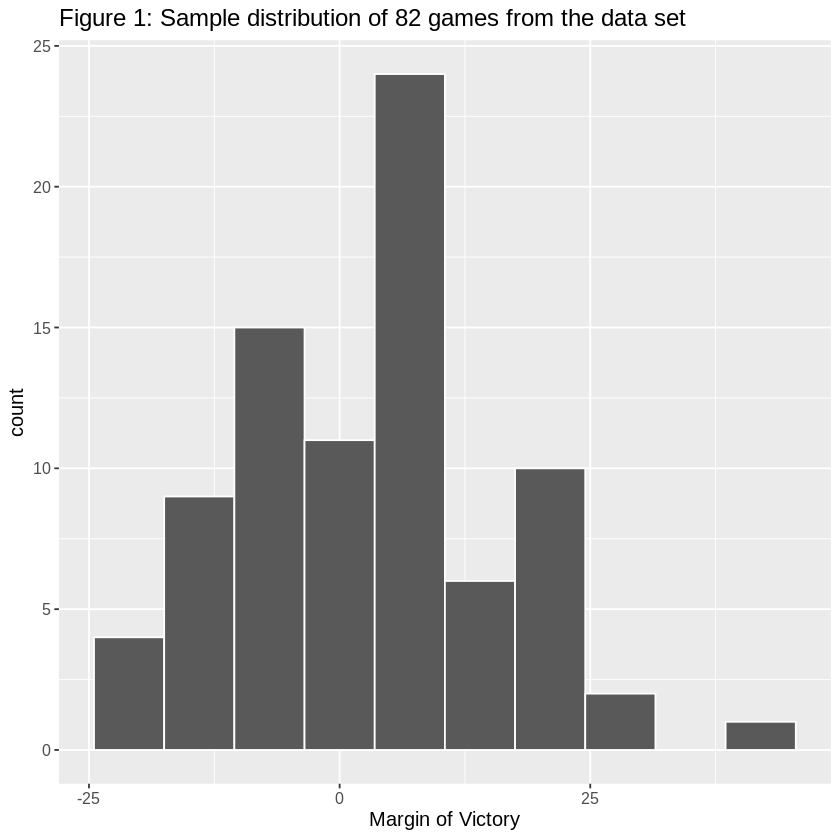

In [15]:
# Plotting the sample 
sample_dist <- sample %>%
    ggplot(aes(x = home_margin)) +
    geom_histogram(binwidth = 7, color = "white") + 
    xlab("Margin of Victory") +
    ggtitle("Figure 1: Sample distribution of 82 games from the data set ") + 
    theme(text = element_text(size = 12))

sample_dist

We can see that the sample distribution in figure 1 is unimodal and is roughly bell shaped.

In [6]:
# Calculate mean test statistic for the one sample
sample_mean <- summarize(sample, mean_home_margin = mean(home_margin)) %>%
    pull()
sample_mean

[1] 3.097561

Let's plot that on top of the sample distribution.

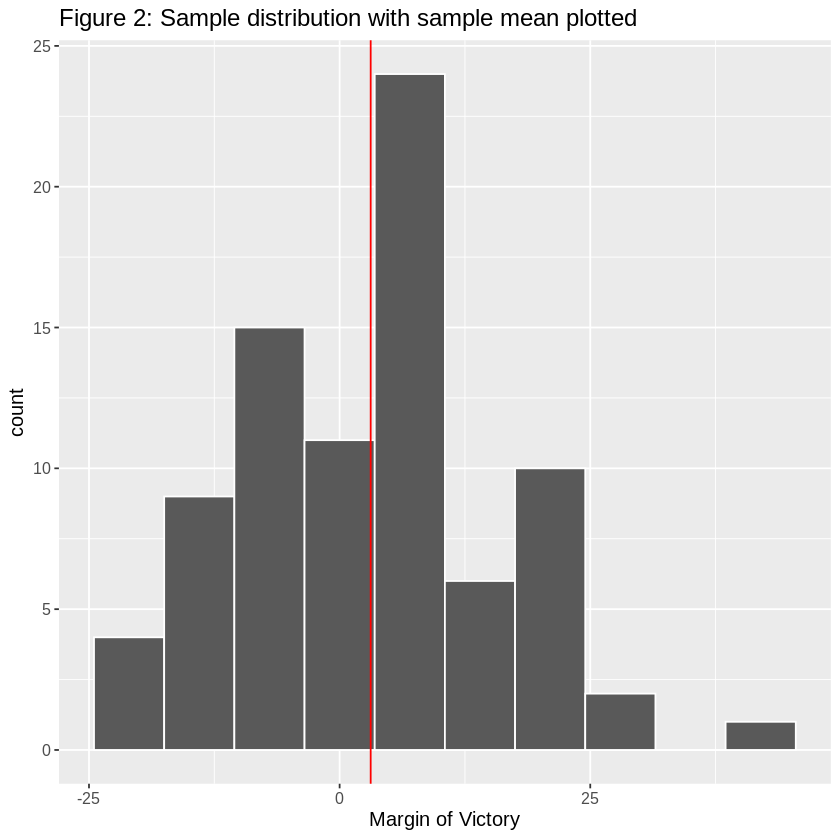

In [14]:
# Plot the sample with mean projected
sample_dist_with_mean <- sample %>%
    ggplot(aes(x = home_margin)) +
    geom_histogram(binwidth = 7, color = "white") + 
    xlab("Margin of Victory") +
    ggtitle("Figure 2: Sample distribution with sample mean plotted") + 
    geom_vline(xintercept = sample_mean, colour="red") +
    theme(text = element_text(size = 12))

sample_dist_with_mean

Now we create our bootstrap distribution with the infer package.

In [8]:
set.seed(1)
# Create a boostrap null distribution with 1000 reps [[NOTE: change this number?]]
null_dist <- sample %>%
    specify(response = home_margin) %>%
    hypothesise(null = "point", mu = 0) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "mean")

head(null_dist)

replicate,stat
<int>,<dbl>
1,1.98780488
2,2.54878049
3,-2.17073171
4,1.17073171
5,-0.06097561
6,0.40243902


**Table 2:** First 6 rows of bootstrap distribution with calculated stat.

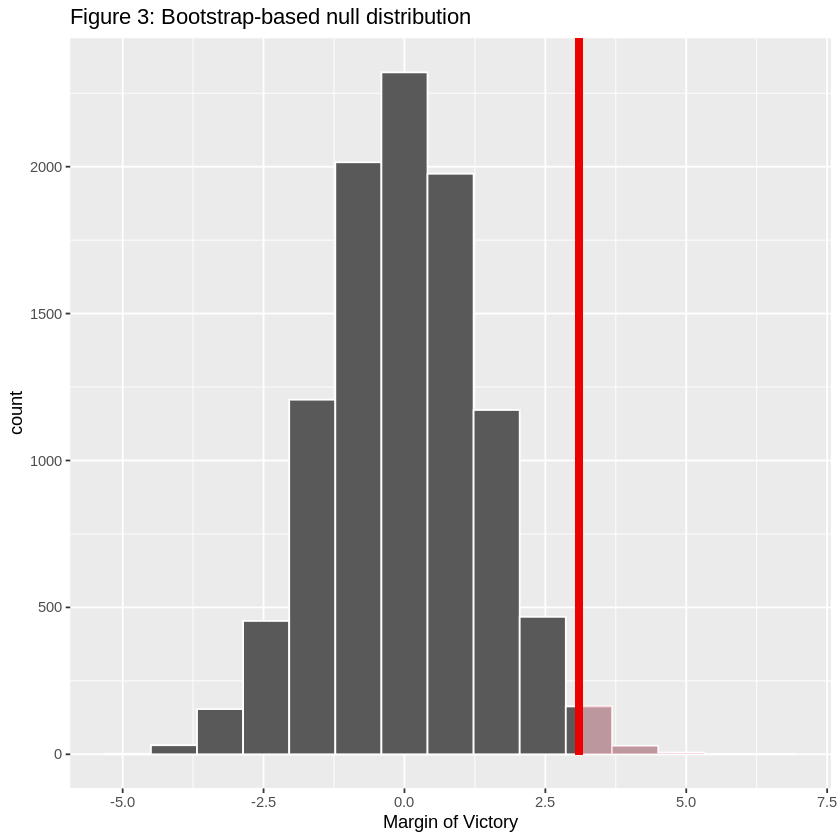

In [12]:
# Visualize null model with p value plotted
null_dist_plot <- null_dist %>%
    visualize() +
    shade_p_value(obs_stat = sample_mean, direction = "right") +
    xlab("Margin of Victory") +
    ggtitle("Figure 3: Bootstrap-based null distribution")

null_dist_plot

In [10]:
# Obtain p value

p_value <- mean(null_dist$stat > sample_mean)

p_value

[1] 0.0127

We have obtained a p-value of 0.0127.

# Discussion

After analyzing our data, we have concluded that we can reject the null hypothesis at a significance level of 0.05 and any level greater than our p-value of 0.0127. This means that our findings provide strong evidence to support the idea that the home-field advantage is a statistically significant phenomenon. We found that the true home margin of victory is likely greater than zero, which suggests that teams playing at home have an advantage over visiting teams.

Our analysis indicates that the average home margin of victory is around three points. This means that if two teams with equal skills played each other, we would expect the home team to win by three points, on average. This supports our initial hypothesis that the home crowd creates an environment where the home team is more likely to succeed. Additionally, given the information provided by Belhumeur, 2017, home teams win 60.6% of games. This is a very significant and noticeable advantage and our statistical results reflect this conclusion. 

Our conclusion aligns with the beliefs of many NBA fans and players and also helps justify why NBA teams should strive to achieve a better record to get more home games during the playoffs. Moreover, with the widespread legalization of online sports betting across North America, the potential profitability of this research has increased significantly. Millions of dollars are wagered each day on NBA games, the performance of players, and more specific statistics like the margin of victory in NBA games. Therefore, being able to better estimate the performance of teams is very important to both the sports betting organizations and also the people placing bets on games. 

### Limitations

Our test shows that we should reject the null hypothesis, however, our test does have some limitations. Our test is rather simplistic and does not account for any other parameters that can determine how well teams are playing such as field goal percentage, offensive/defensive rating, or turnover ratio. We chose not to include these parameters in our investigation because we don't know how to properly weigh each of these parameters to determine, in general, the performance of a team. This is why we chose to only use the most important stat: the difference in points at the end of the game. 

Additionally, as our test is an inferential hypothesis test with a p-value, there is still a chance that we may be committing type 1 error. However, since our p-value is so low, the risk of committing type 1 error is likely not a major factor. 

Furthermore, our test only compares NBA games and does not look at basketball games outside of the NBA, where home team advantage may be very different due to outside circumstances. The NBA is the largest basketball league in the world, the games are played in front of the largest crowds where there would be a greater influence from the home crowd, however, the quality of basketball players is also the highest so they may not be impacted as much as players outside of the NBA. 

### Further Questions 

There are a few questions this study naturally leads to. Based on our limitations, one question would be to see if this holds outside of the NBA, or are there significant differences. This may be difficult as the datasets outside of the major leagues are much more sparse, or non-existent. Another question that arises from this study is how this compares with other sports. We worked with basketball as that is what our team is familiar with, but it's natural to say that other sports may have this same correlation. This would be much easier to test as datasets would likely exist for the major leagues of other sports. We can also specify our test to see if there is a certain parameter that is highly impacted by having a home court advantage. For example, we may ask the question if teams tend to commit fewer turnovers when at home. 


# References
Belhumeur, K. (2017, October 3). How important is home-court advantage in the NBA? Bleacher Report. 
    Retrieved March 18, 2023, from https://bleacherreport.com/articles/1520496-how-important-is-home-court-advantage-in-the-nba 
    
Green, J. (2023, February 16). How do the NBA playoffs work? NBA playoffs explained - betway. Betway Insider. 
    Retrieved March 18, 2023, from https://blog.betway.com/basketball/how-do-the-nba-playoffs-work-nba-playoffs-explained/ 

Kotecki, J. (2014, May). Estimating the effect of home court advantage on wins in the NBA. The Park Place Economist. 
    Retrieved April 12, 2023, from https://digitalcommons.iwu.edu/cgi/viewcontent.cgi?httpsredir=1&amp;article=1412&amp;context=parkplace 
